In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
# 1. Load Dataset

data = load_iris()
X = data.data
y = data.target
target_names = data.target_names

print(f"Features shape: {X.shape}, Labels shape: {y.shape}")
print("Target names:", target_names)

Features shape: (150, 4), Labels shape: (150,)
Target names: ['setosa' 'versicolor' 'virginica']


In [3]:
# 2. Standardize Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
# 3. Apply LDA

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)

print("\nExplained variance ratio (LDA components):", lda.explained_variance_ratio_)


Explained variance ratio (LDA components): [0.9912126 0.0087874]


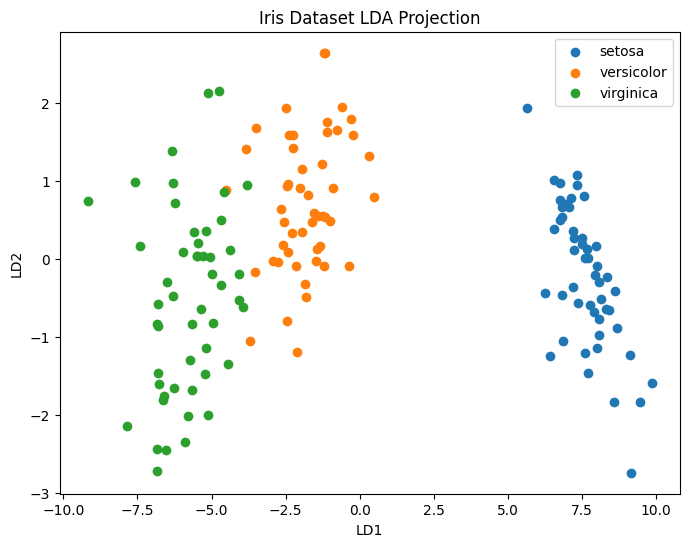

In [9]:
# 4. Visualization of LDA Projection

plt.figure(figsize=(8,6))
for target in np.unique(y):
    plt.scatter(X_lda[y==target, 0], X_lda[y==target, 1], label=target_names[target])
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("Iris Dataset LDA Projection")
plt.legend()
plt.show()

In [10]:
# 4. Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X_lda, y, test_size=0.3, random_state=42, stratify=y
)

In [11]:
# 5. Gaussian Naive Bayes

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


Accuracy with LDA + GaussianNB: 0.98

Confusion Matrix:


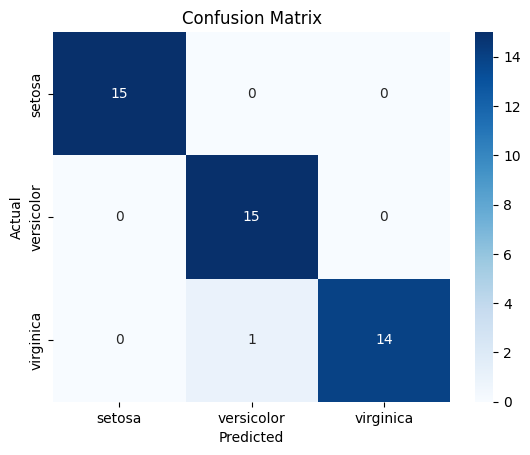


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [12]:
# 6. Evaluation

acc = accuracy_score(y_test, y_pred)
print(f"\nAccuracy with LDA + GaussianNB: {acc:.2f}")

print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))